In [1]:
import os
import random
import matplotlib
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import numpy as np
import shutil
import tensorflow as tf
import pathlib
import imageio.v3 as iio
import pickle

#allowing images embedding in notebook
%matplotlib inline

Unziping the dataset

In [2]:
data_dir_path = "/content/drive/MyDrive"
shutil.unpack_archive(data_dir_path + "/BelgiumTS.zip", data_dir_path)

data_dir = pathlib.Path(data_dir_path + "/obj/").with_suffix('')

image_files = list(data_dir.glob('*.ppm'))
print(len(image_files))

KeyboardInterrupt: 

Printing the first 10 images from training and from testing

Testing Images:


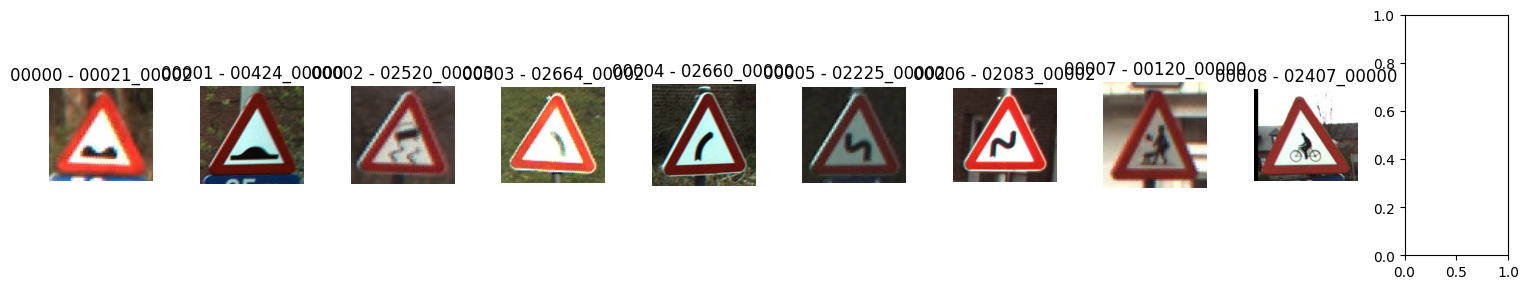

Training Images:


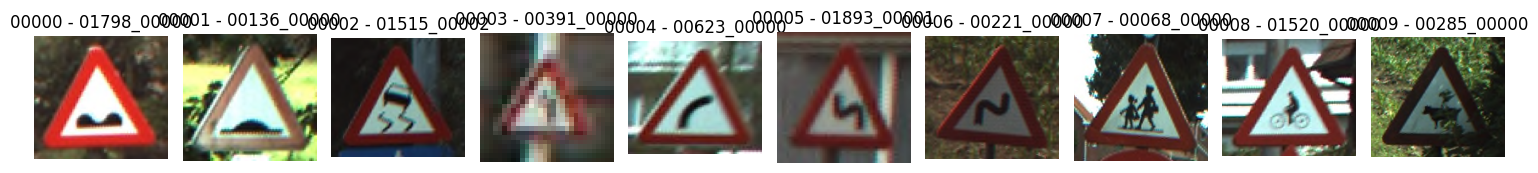

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Define the paths for the training and testing datasets
testing_dir = '/content/drive/MyDrive/Testing'
training_dir = '/content/drive/MyDrive/Training'

# Function to display images from a given directory
def display_images_from_directory(directory, num_images=10):
    # Get the class directories
    class_dirs = sorted(os.listdir(directory))[:num_images]  # limit to num_images
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3))

    for i, class_dir in enumerate(class_dirs):
        # Get all images in the class directory
        class_path = os.path.join(directory, class_dir)
        image_files = sorted(os.listdir(class_path))[:num_images]  # limit to num_images per class

        for j, image_file in enumerate(image_files):
            # Check if the file is a .ppm image
            if image_file.endswith('.ppm'):
                image_path = os.path.join(class_path, image_file)
                img = Image.open(image_path)

                # Display the image
                ax = axes[i]
                ax.imshow(img)
                ax.axis('off')  # Hide axes
                ax.set_title(f"{class_dir} - {image_file.split('.')[0]}")

    plt.tight_layout()
    plt.show()

# Display the first 10 images from Testing directory
print("Testing Images:")
display_images_from_directory(testing_dir, num_images=10)

# Display the first 10 images from Training directory
print("Training Images:")
display_images_from_directory(training_dir, num_images=10)


In [ ]:
!pip install imageio[pyav]


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.5/39.5 MB 25.5 MB/s eta 0:00:00


Creating the dataset

In [ ]:
def load_data(data_dir):
    """Loads a dataset and returns two lists:

    images: a list of Numpy arrays, each representing an image.
    labels: a list of numbers that represent the image labels.
    """
    # Get all subdirectories of data_dir. Each represents a label.
    directories = [d for d in os.listdir(data_dir)
                   if os.path.isdir(os.path.join(data_dir, d))]

    labels = []
    images = []

    for d in directories:
        label_dir = os.path.join(data_dir, d)
        print(f"Processing directory: {label_dir}")

        file_names = [os.path.join(label_dir, f)
                      for f in os.listdir(label_dir) if f.endswith(".ppm")]

        # Load images and corresponding labels
        for f in file_names:
            try:
                img = cv2.imread(f)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)#convert to RGB format
                images.append(img)
                labels.append(int(d))  # Convert folder name to integer label
            except Exception as e:
                print(f"Error loading {f}: {e}")

    return images, labels

# Load training and testing datasets.
ROOT_PATH = "/content/drive/MyDrive/"
train_data_dir = os.path.join(ROOT_PATH, "Training")
test_data_dir = os.path.join(ROOT_PATH, "Testing")

images, labels = load_data(train_data_dir)


Processing directory: /content/drive/MyDrive/Training/00000
Processing directory: /content/drive/MyDrive/Training/00001
Processing directory: /content/drive/MyDrive/Training/00002
Processing directory: /content/drive/MyDrive/Training/00003
Processing directory: /content/drive/MyDrive/Training/00004
Processing directory: /content/drive/MyDrive/Training/00005
Processing directory: /content/drive/MyDrive/Training/00006
Processing directory: /content/drive/MyDrive/Training/00007
Processing directory: /content/drive/MyDrive/Training/00008
Processing directory: /content/drive/MyDrive/Training/00009
Processing directory: /content/drive/MyDrive/Training/00010
Processing directory: /content/drive/MyDrive/Training/00011
Processing directory: /content/drive/MyDrive/Training/00012
Processing directory: /content/drive/MyDrive/Training/00013
Processing directory: /content/drive/MyDrive/Training/00014
Processing directory: /content/drive/MyDrive/Training/00015
Processing directory: /content/drive/MyD

Save variables for efficiency

In [ ]:
import pickle

with open("/content/drive/MyDrive/images.pkl", "wb") as f:
    pickle.dump(images, f)

with open("/content/drive/MyDrive/labels.pkl", "wb") as f:
    pickle.dump(labels, f)



Load back

In [3]:
# Load variable back
with open("/content/drive/MyDrive/images.pkl", "rb") as f:
    images = pickle.load(f)
with open("/content/drive/MyDrive/labels.pkl", "rb") as f:
    labels = pickle.load(f)

for image in images:
  print(image)

Streaming output truncated to the last 5000 lines.
  [26 24 20]
  [24 23 19]]]
[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  1   1   0]
  [  0   1   0]
  [  0   1   0]
  ...
  [  0   1   1]
  [  0   1   1]
  [  0   1   1]]

 ...

 [[145 202 213]
  [144 201 212]
  [143 200 212]
  ...
  [150 210 219]
  [151 212 220]
  [152 213 221]]

 [[145 202 213]
  [144 201 212]
  [143 200 211]
  ...
  [149 210 218]
  [150 212 219]
  [151 213 220]]

 [[145 202 213]
  [144 201 212]
  [143 199 210]
  ...
  [148 210 217]
  [150 212 219]
  [151 214 220]]]
[[[153 212 226]
  [152 211 225]
  [151 210 224]
  ...
  [112 184 200]
  [ 97 169 185]
  [ 90 162 178]]

 [[153 212 226]
  [152 212 226]
  [151 210 224]
  ...
  [112 182 198]
  [ 96 167 182]
  [ 88 159 174]]

 [[153 213 227]
  [152 212 226]
  [151 211 225]
  ...
  [111 180 195]
  [ 93 162 17

Results:

In [4]:
print("Unique Labels: {0}\nTotal Images: {1}".format(len(set(labels)), len(images)))

Unique Labels: 62
Total Images: 4591


First Image of

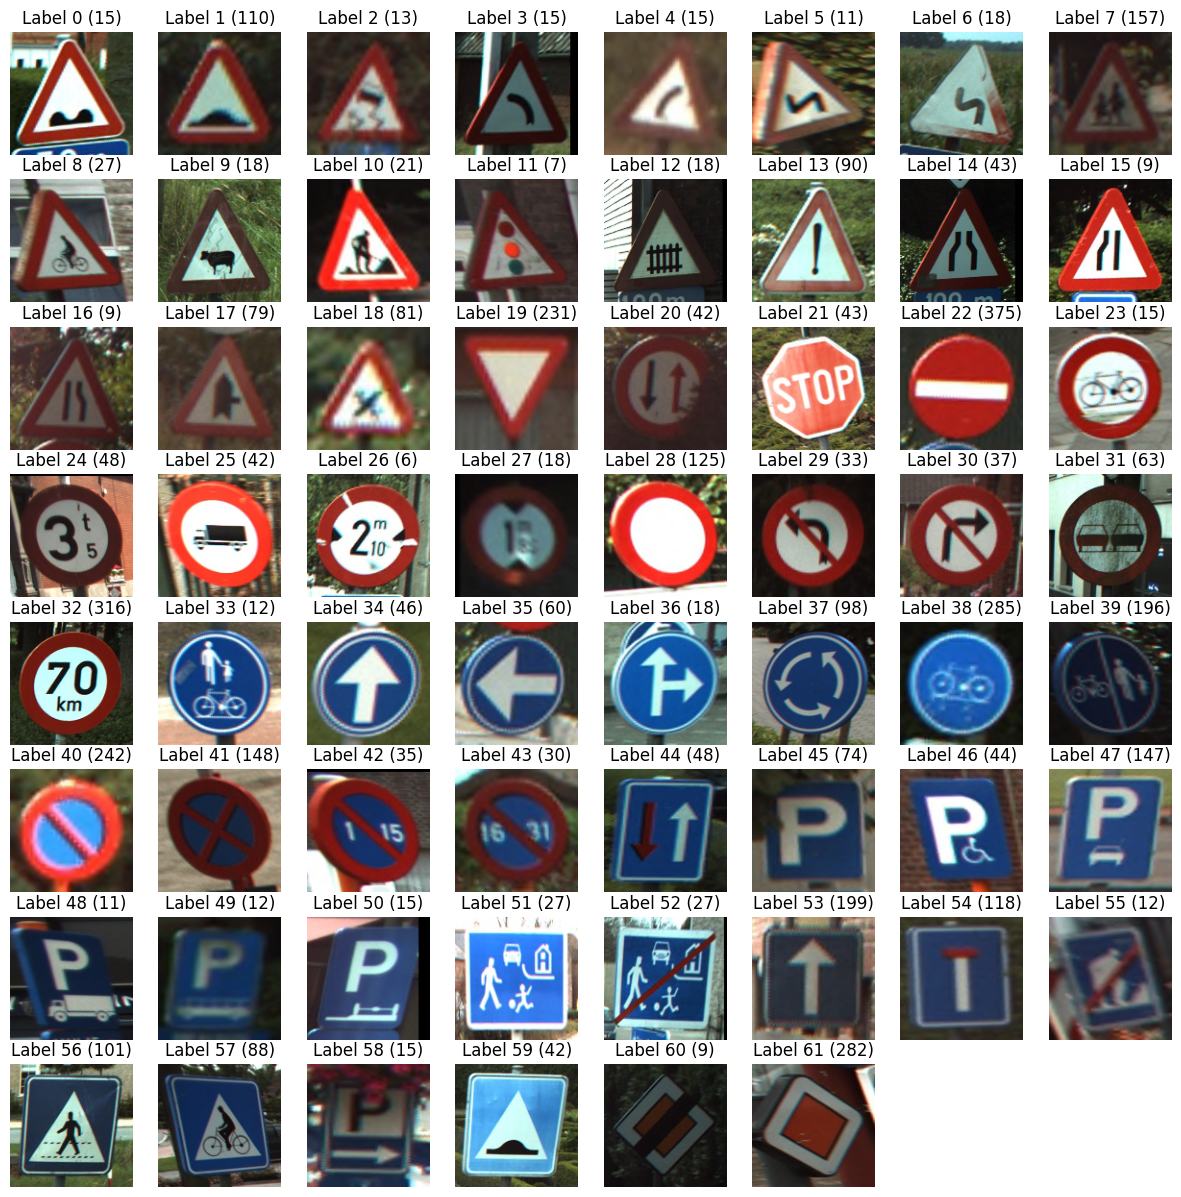

In [5]:
def display_images_and_labels(images, labels):
    """Display the first image of each label."""
    unique_labels = set(labels)
    plt.figure(figsize=(15, 15))
    i = 1
    for label in unique_labels:
        # Pick the first image for each label.
        image = images[labels.index(label)]
        plt.subplot(8, 8, i)  # A grid of 8 rows x 8 columns
        plt.axis('off')
        plt.title("Label {0} ({1})".format(label, labels.count(label)))
        i += 1
        _ = plt.imshow(image)
    plt.show()

display_images_and_labels(images, labels)

Displaying a random label

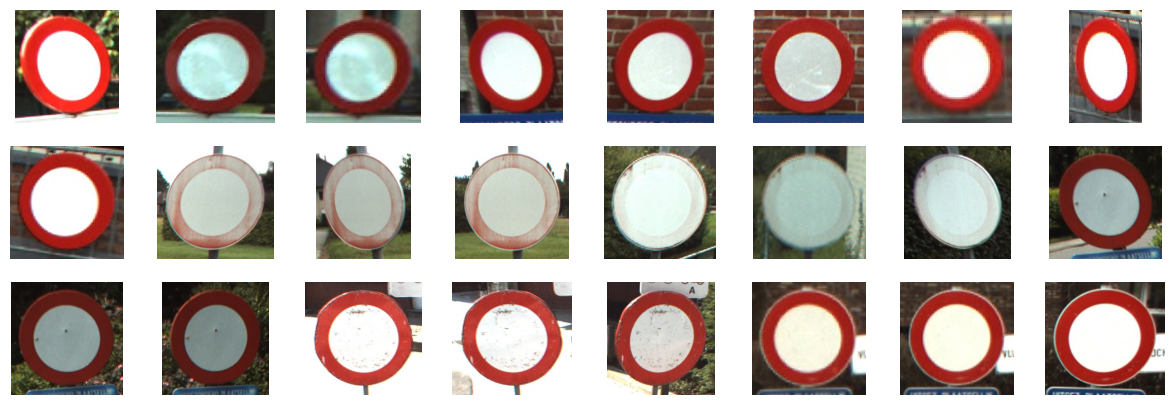

In [ ]:
def display_label_images(images, label):
    """Display images of a specific label."""
    limit = 24  # show a max of 24 images
    plt.figure(figsize=(15, 5))
    i = 1

    start = labels.index(label)
    end = start + labels.count(label)
    for image in images[start:end][:limit]:
        plt.subplot(3, 8, i)  # 3 rows, 8 per row
        plt.axis('off')
        i += 1
        plt.imshow(image)
    plt.show()

display_label_images(images, 28)

Check Image Size

In [ ]:
for image in images[:5]:
    print("shape: {0}, min: {1}, max: {2}".format(image.shape, image.min(), image.max()))

shape: (141, 142, 3), min: 0, max: 255
shape: (120, 123, 3), min: 0, max: 255
shape: (105, 107, 3), min: 0, max: 255
shape: (94, 105, 3), min: 7, max: 255
shape: (128, 139, 3), min: 0, max: 255


Format images for 00000 subfolder.

In [ ]:
# Define paths
ROOT_PATH = "/content/drive/MyDrive/Training/"
OUTPUT_PATH = "/content/drive/MyDrive/Processed/"

# Create output directory for processed images
os.makedirs(os.path.join(OUTPUT_PATH, "images"), exist_ok=True)

# Image size for resizing
input_size = 128

# Load annotations
csv_file = "/content/drive/MyDrive/Training/00000/GT-00000.csv"
df = pd.read_csv(csv_file, sep=";")

# New annotations storage
new_annotations = []

def resize(img, bbox):
    """Resizes the image to 128x128, adjusts bounding box, and draws a green box (keeps RGB format)."""
    h, w = img.shape[:2]
    scale_w = input_size / w
    scale_h = input_size / h

    # Resize image while maintaining RGB format
    resized_img = cv2.resize(img, (input_size, input_size), interpolation=cv2.INTER_LINEAR)

    # Resize bounding box
    x1, y1, x2, y2 = bbox
    x1 = int(x1 * scale_w)
    y1 = int(y1 * scale_h)
    x2 = int(x2 * scale_w)
    y2 = int(y2 * scale_h)

    # Draw green bounding box on the resized image (keeps RGB)
    cv2.rectangle(resized_img, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green color (0,255,0) with 2px thickness

    return resized_img, (x1, y1, x2, y2)

# Process each image
for index, row in df.iterrows():
    filename = row["Filename"]
    image_path = os.path.join(ROOT_PATH, "00000", filename)

    # Read image (keep RGB format)
    img = cv2.imread(image_path)
    if img is None:
        print(f"Failed to load: {filename}")
        continue

    # Convert BGR to RGB (since OpenCV loads images in BGR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Original bounding box
    bbox = (row["Roi.X1"], row["Roi.Y1"], row["Roi.X2"], row["Roi.Y2"])

    # Resize and apply bounding box mask
    final_image, new_bbox = resize(img, bbox)

    # Save the processed image
    cv2.imwrite(os.path.join(OUTPUT_PATH, "images", filename), cv2.cvtColor(final_image, cv2.COLOR_RGB2BGR))

    # Store new annotation
    new_annotations.append([filename, input_size, input_size, *new_bbox, row["ClassId"]])

# Save new CSV file
new_csv_path = os.path.join(OUTPUT_PATH, "new_annotations.csv")
new_df = pd.DataFrame(new_annotations, columns=["Filename", "Width", "Height", "Roi.X1", "Roi.Y1", "Roi.X2", "Roi.Y2", "ClassId"])
new_df.to_csv(new_csv_path, sep=";", index=False)

print(f"Processing complete! Resized RGB images with masks and updated annotations saved to {OUTPUT_PATH}")


Processing complete! Resized RGB images with masks and updated annotations saved to /content/drive/MyDrive/Processed/


Resized images and new annotations into Training_processed

In [ ]:
# Define input and output paths
ROOT_PATH = "/content/drive/MyDrive/Training/"
OUTPUT_PATH = "/content/drive/MyDrive/Training_processed/"
input_size = 128  # Target image size

# Ensure output directories exist
os.makedirs(OUTPUT_PATH, exist_ok=True)

def resize_and_adjust_bbox(img, bbox):
    """Resizes the image to 128x128 and adjusts the bounding box without drawing it."""
    h, w = img.shape[:2]
    scale_w = input_size / w
    scale_h = input_size / h

    # Resize image
    resized_img = cv2.resize(img, (input_size, input_size), interpolation=cv2.INTER_LINEAR)

    # Resize bounding box
    x1, y1, x2, y2 = bbox
    x1 = int(x1 * scale_w)
    y1 = int(y1 * scale_h)
    x2 = int(x2 * scale_w)
    y2 = int(y2 * scale_h)

    return resized_img, (x1, y1, x2, y2)

# Process all subdirectories in Training
for folder in sorted(os.listdir(ROOT_PATH)):
    folder_path = os.path.join(ROOT_PATH, folder)
    if not os.path.isdir(folder_path):
        continue  # Skip files, only process folders

    print(f"Processing folder: {folder}")

    # Define paths for new directory structure
    output_folder = os.path.join(OUTPUT_PATH, folder)
    images_output_folder = os.path.join(output_folder, "images")
    os.makedirs(images_output_folder, exist_ok=True)

    # CSV file for current folder
    csv_file = os.path.join(folder_path, f"GT-{folder}.csv")
    if not os.path.exists(csv_file):
        print(f"Annotation file missing: {csv_file}, skipping...")
        continue

    # Load annotations
    df = pd.read_csv(csv_file, sep=";")
    new_annotations = []

    # Process each image
    for index, row in df.iterrows():
        filename = row["Filename"]
        image_path = os.path.join(folder_path, filename)

        # Read image
        img = cv2.imread(image_path)
        if img is None:
            print(f"Failed to load: {filename}")
            continue

        # Convert BGR to RGB
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Original bounding box
        bbox = (row["Roi.X1"], row["Roi.Y1"], row["Roi.X2"], row["Roi.Y2"])

        # Resize and adjust bounding box (without drawing it)
        final_image, new_bbox = resize_and_adjust_bbox(img, bbox)

        # Save the processed image
        new_filename = filename.replace(".ppm", ".png")
        new_image_path = os.path.join(images_output_folder, new_filename)
        cv2.imwrite(new_image_path, cv2.cvtColor(final_image, cv2.COLOR_RGB2BGR))

        # Store new annotation
        new_annotations.append([new_filename, input_size, input_size, *new_bbox, row["ClassId"]])

    # Save new CSV file
    new_csv_path = os.path.join(output_folder, f"GT-{folder}.csv")
    new_df = pd.DataFrame(new_annotations, columns=["Filename", "Width", "Height", "Roi.X1", "Roi.Y1", "Roi.X2", "Roi.Y2", "ClassId"])
    new_df.to_csv(new_csv_path, sep=";", index=False)

Processing folder: 00000
Processing folder: 00001
Processing folder: 00002
Processing folder: 00003
Processing folder: 00004
Processing folder: 00005
Processing folder: 00006
Processing folder: 00007
Processing folder: 00008
Processing folder: 00009
Processing folder: 00010
Processing folder: 00011
Processing folder: 00012
Processing folder: 00013
Processing folder: 00014
Processing folder: 00015
Processing folder: 00016
Processing folder: 00017
Processing folder: 00018
Processing folder: 00019
Processing folder: 00020
Processing folder: 00021
Processing folder: 00022
Processing folder: 00023
Processing folder: 00024
Processing folder: 00025
Processing folder: 00026
Processing folder: 00027
Processing folder: 00028
Processing folder: 00029
Processing folder: 00030
Processing folder: 00031
Processing folder: 00032
Processing folder: 00033
Processing folder: 00034
Processing folder: 00035
Processing folder: 00036
Processing folder: 00037
Processing folder: 00038
Processing folder: 00039


Creating the training dataset with the processed images and adjusted annotations

In [ ]:
def load_data(data_dir):
    """Loads a dataset and returns three lists:

    - images: a list of Numpy arrays, each representing an image.
    - labels: a list of numbers that represent the image labels.
    - bboxes: a list of bounding boxes for each image (x1, y1, x2, y2).
    """
    directories = [d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))]

    labels = []
    images = []
    bboxes = []

    for d in directories:
        label_dir = os.path.join(data_dir, d, "images")  # Path to images
        csv_file = os.path.join(data_dir, d, f"GT-{d}.csv")  # Path to bounding box CSV file

        if not os.path.exists(label_dir):
            print(f"Skipping {label_dir}, 'images' folder not found.")
            continue

        if not os.path.exists(csv_file):
            print(f"Skipping {csv_file}, bounding box file not found.")
            continue

        print(f"Processing directory: {label_dir}")

        # Load bounding box annotations from CSV
        bbox_data = pd.read_csv(csv_file, sep=";")  # Assumes columns: ["Filename", "Width", "Height", "Roi.X1", "Roi.Y1", "Roi.X2", "Roi.Y2", "ClassId"]

        # Load images and corresponding labels + bounding boxes
        for index, row in bbox_data.iterrows():
            image_path = os.path.join(label_dir, row["Filename"])

            if os.path.exists(image_path):
                try:
                    img = cv2.imread(image_path)
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
                    images.append(img)
                    labels.append(int(row["ClassId"]))  # Use ClassId from CSV
                    bboxes.append([row["Roi.X1"], row["Roi.Y1"], row["Roi.X2"], row["Roi.Y2"]])  # Bounding box coords
                except Exception as e:
                    print(f"Error loading {image_path}: {e}")

    return images, labels, bboxes

# Define dataset path
ROOT_PATH = "/content/drive/MyDrive/"
train_data_dir = os.path.join(ROOT_PATH, "Training_processed")

# Load dataset
images, labels, bboxes = load_data(train_data_dir)


Processing directory: /content/drive/MyDrive/Training_processed/00000/images
Processing directory: /content/drive/MyDrive/Training_processed/00001/images
Processing directory: /content/drive/MyDrive/Training_processed/00002/images
Processing directory: /content/drive/MyDrive/Training_processed/00003/images
Processing directory: /content/drive/MyDrive/Training_processed/00004/images
Processing directory: /content/drive/MyDrive/Training_processed/00005/images
Processing directory: /content/drive/MyDrive/Training_processed/00006/images
Processing directory: /content/drive/MyDrive/Training_processed/00007/images
Processing directory: /content/drive/MyDrive/Training_processed/00008/images
Processing directory: /content/drive/MyDrive/Training_processed/00009/images
Processing directory: /content/drive/MyDrive/Training_processed/00010/images
Processing directory: /content/drive/MyDrive/Training_processed/00011/images
Processing directory: /content/drive/MyDrive/Training_processed/00012/images

Save resized images

In [ ]:
with open("/content/drive/MyDrive/images.pkl", "wb") as f:
    pickle.dump(images, f)

with open("/content/drive/MyDrive/labels.pkl", "wb") as f:
    pickle.dump(labels, f)

with open("/content/drive/MyDrive/box.pkl", "wb") as f:
    pickle.dump(bboxes, f)

Load

In [6]:
# Load variables back
with open("/content/drive/MyDrive/images.pkl", "rb") as f:
    images = pickle.load(f)
with open("/content/drive/MyDrive/labels.pkl", "rb") as f:
    labels = pickle.load(f)

with open("/content/drive/MyDrive/box.pkl", "rb") as f:
    bboxes = pickle.load(f)

Testing the data

In [7]:
for image in images[15:20]:
  print(image)
for label in labels[15:20]:
  print(label)
for box in bboxes[15:20]:
  print(box)

[[[41 42 34]
  [42 43 36]
  [44 47 39]
  ...
  [41 38 28]
  [41 39 28]
  [41 39 28]]

 [[41 43 35]
  [43 44 36]
  [45 47 40]
  ...
  [41 38 28]
  [41 39 28]
  [41 39 28]]

 [[43 45 37]
  [44 46 39]
  [46 49 42]
  ...
  [42 39 29]
  [41 39 29]
  [41 40 29]]

 ...

 [[40 44 37]
  [41 45 38]
  [43 47 40]
  ...
  [31 30 28]
  [31 29 27]
  [31 29 27]]

 [[39 42 35]
  [39 44 37]
  [41 46 39]
  ...
  [30 29 27]
  [30 28 26]
  [30 28 26]]

 [[38 42 35]
  [39 43 36]
  [41 46 39]
  ...
  [30 28 27]
  [30 28 26]
  [30 28 26]]]
[[[ 39  41  34]
  [ 39  41  33]
  [ 39  41  33]
  ...
  [ 37  41  36]
  [ 31  47  44]
  [ 25  51  50]]

 [[ 40  42  35]
  [ 39  41  34]
  [ 38  39  32]
  ...
  [ 39  44  40]
  [ 34  50  48]
  [ 28  54  53]]

 [[ 41  43  37]
  [ 39  40  34]
  [ 36  37  31]
  ...
  [ 43  47  44]
  [ 38  54  53]
  [ 32  60  59]]

 ...

 [[ 31  30  19]
  [ 31  29  19]
  [ 30  27  17]
  ...
  [135 199 188]
  [147 203 183]
  [157 204 177]]

 [[ 35  35  22]
  [ 34  33  21]
  [ 33  30  19]
  ...
  

Shuffling the dataset. Cause: Keras will take the last 20% of images_a for validation, so if your data is sorted (e.g., by class), it might not generalize well.

In [8]:
from sklearn.utils import shuffle
images, labels, bboxes = shuffle(images, labels, bboxes, random_state=42)

Creating the model\
1.Checking data size



In [9]:
# Convert to NumPy arrays
labels_a = np.array(labels)
images_a = np.array(images)
bboxes_a = np.array(bboxes)

print("Labels shape:", labels_a.shape)
print("Images shape:", images_a.shape)
print("Bounding boxes shape:", bboxes_a.shape)


#Testing that all images have the same size
# expected_shape = (128, 128, 3)

# for i, img in enumerate(images):
#     if img.shape != expected_shape:
#         print(f"Image at index {i} has shape {img.shape} instead of {expected_shape}")


Labels shape: (4591,)
Images shape: (4591, 128, 128, 3)
Bounding boxes shape: (4591, 4)


In [10]:
# Using Keras functional API inputs
images_ph = tf.keras.Input(shape=(128, 128, 3), name="images")  # 128x128 images
labels_ph = tf.keras.Input(shape=(), dtype=tf.int32, name="labels")  # Class labels (scalar)
bboxes_ph = tf.keras.Input(shape=(4,), dtype=tf.float32, name="bboxes")  # Bounding boxes (x1, y1, x2, y2)

# Building the CNN Model
def build_cnn(images):
    """Constructs a CNN model for object detection."""
    net = tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same')(images)
    net = tf.keras.layers.MaxPooling2D((2,2))(net)

    net = tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same')(net)
    net = tf.keras.layers.MaxPooling2D((2,2))(net)

    net = tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same')(net)
    net = tf.keras.layers.MaxPooling2D((2,2))(net)

    net = tf.keras.layers.Flatten()(net)

    net = tf.keras.layers.Dense(256, activation='relu')(net)
    net = tf.keras.layers.Dense(128, activation='relu')(net)

    class_logits = tf.keras.layers.Dense(62, activation='softmax', name="class_output")(net)  # Class prediction
    bbox_preds = tf.keras.layers.Dense(4, name="bbox_output")(net)  # Bounding box (x1, y1, x2, y2)

    return tf.keras.Model(inputs=images, outputs=[class_logits, bbox_preds])

# Getting model outputs
model = build_cnn(images_ph)

# Compiling the Model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss={"class_output": "sparse_categorical_crossentropy", "bbox_output": "mse"},
    metrics={"class_output": "accuracy"}
)

# Debugging prints
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ images (InputLayer)       │ (None, 128, 128, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 128, 128, 32)   │            896 │ images[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 64, 64, 32)     │              0 │ conv2d[0][0]           │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 64, 64, 64)     │         18,496 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 32, 32, 64)     │              0 │ conv2d_1[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 32, 32, 128)    │         73,856 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_2           │ (None, 16, 16, 128)    │              0 │ conv2d_2[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten (Flatten)         │ (None, 32768)          │              0 │ max_pooling2d_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 256)            │      8,388,864 │ flatten[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 128)            │         32,896 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ class_output (Dense)      │ (None, 62)             │          7,998 │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bbox_output (Dense)       │ (None, 4)              │            516 │ dense_1[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 8,523,522 (32.51 MB)

 Trainable params: 8,523,522 (32.51 MB)

 Non-trainable params: 0 (0.00 B)

Training the model

In [11]:
model.fit(
    x=images_a,  # Input images
    y={"class_output": labels_a, "bbox_output": bboxes_a},  # Class labels & bounding boxes
    batch_size=32,
    epochs=10,
    validation_split=0.2  # 20% of data used for validation
)

Epoch 1/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 164s 1s/step - bbox_output_loss: 15278.8799 - class_output_accuracy: 0.0356 - class_output_loss: 51.5099 - loss: 15330.5303 - val_bbox_output_loss: 953.5187 - val_class_output_accuracy: 0.1023 - val_class_output_loss: 6.2261 - val_loss: 964.6871
Epoch 2/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 218s 2s/step - bbox_output_loss: 891.0884 - class_output_accuracy: 0.0938 - class_output_loss: 6.0938 - loss: 897.1851 - val_bbox_output_loss: 791.6916 - val_class_output_accuracy: 0.1208 - val_class_output_loss: 5.6510 - val_loss: 801.2789
Epoch 3/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 187s 1s/step - bbox_output_loss: 705.2410 - class_output_accuracy: 0.1939 - class_output_loss: 5.0461 - loss: 710.2786 - val_bbox_output_loss: 568.8989 - val_class_output_accuracy: 0.2535 - val_class_output_loss: 4.4073 - val_loss: 575.6361
Epoch 4/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 196s 1s/step - bbox_output_loss: 583.2578 - class_output_accuracy: 0.2927 - class_output_loss: 3.9186 - loss: 58

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


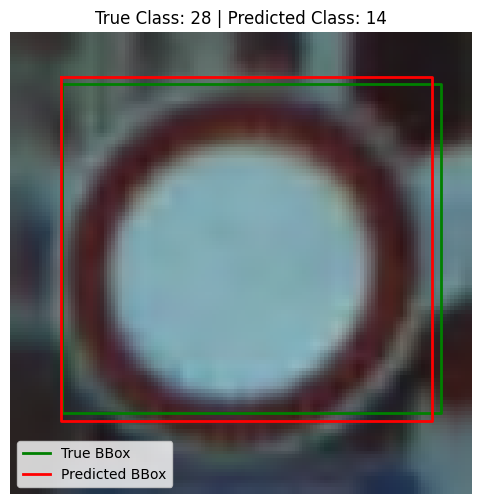

In [17]:
def test_model(model, test_images, test_labels, test_bboxes, index=0):
    """
    Test the model on a single test image.

    Parameters:
    - model: The trained Keras model
    - test_images: NumPy array of test images
    - test_labels: NumPy array of ground truth labels
    - test_bboxes: NumPy array of ground truth bounding boxes
    - index: Index of the test sample to visualize
    """
    # Select one test image
    image = test_images[index]

    # Expand dimensions to match model input shape (batch size 1)
    image_input = np.expand_dims(image, axis=0)

    # Get predictions
    class_pred, bbox_pred = model.predict(image_input)

    # Convert class prediction to label
    predicted_class = np.argmax(class_pred)  # Get the class with the highest probability
    true_class = test_labels[index]

    # Bounding box predictions
    predicted_bbox = bbox_pred[0]
    true_bbox = test_bboxes[index]

    # Plot the image
    plt.figure(figsize=(6,6))
    plt.imshow(image)
    plt.axis("off")

    # Draw the true bounding box (green) and predicted bounding box (red)
    def draw_bbox(bbox, color, label):
        x1, y1, x2, y2 = bbox
        plt.plot([x1, x2, x2, x1, x1], [y1, y1, y2, y2, y1], color=color, linewidth=2, label=label)

    draw_bbox(true_bbox, "green", "True BBox")
    draw_bbox(predicted_bbox, "red", "Predicted BBox")
    plt.legend()

    # Display results
    plt.title(f"True Class: {true_class} | Predicted Class: {predicted_class}")
    plt.show()

# Example usage (assuming you have test_images, test_labels, and test_bboxes)
test_model(model, images_a, labels_a, bboxes_a, index=24)
